# Proyek Analisis Data: Kualitas Udara di Stasiun Tiantan
- **Nama:** Mhd. Rahul Bhatara Guru
- **Email:** rahulbhataraguru@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/rahulbhatara

## Menentukan Pertanyaan Bisnis

- Bagaimana suhu cuaca berubah sepanjang tahunnya?
- Bagaimana korelasi antara suhu udara (TEMP) dan kualitas ozon (O3) di atmosfer?

## Import Semua Packages/Library yang Digunakan

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os

## Data Wrangling

### Gathering Data

In [87]:
csv_files = [file for file in os.listdir('data/') if file.endswith('.csv')]
dataframes = []
for file in csv_files:
    file_path = os.path.join('data/', file)
    d = pd.read_csv(file_path)
    dataframes.append(d)    

dfnotfix = pd.concat(dataframes, ignore_index=True)
dfnotfix.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


**Insight:**
- Kode tersebut melakukan pengumpulan data dengan mencari dan membaca semua file CSV yang ada di folder 'data/' secara otomatis ke dalam list dataframes.
- Kemudian semua DataFrame yang terkumpul digabungkan menjadi satu DataFrame tunggal menggunakan pd.concat() dengan mengabaikan index aslinya (ignore_index=True) untuk memudahkan analisis selanjutnya.

### Assessing Data

In [88]:
dfnotfix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [89]:
dfnotfix.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [90]:
print("Jumlah duplikasi: ",dfnotfix.duplicated().sum())
dfnotfix.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


**Insight:**
- Setelah melihat dari output code pertama dan hasil plot dari 2 code di atas, tidak ditemukan adanya duplikasi pada data dan terdapat beberapa missing values pada beberapa kolom parameter dan polutan udara.

### Cleaning Data

In [91]:
df = dfnotfix.copy()
columns_numerik_to_fill = df.select_dtypes(include=['float64']).columns
for col in columns_numerik_to_fill:
    df[col].fillna(df[col].mean(), inplace=True)
columns_object = df.select_dtypes(include=['object']).columns
for col in columns_object:
    df[col].fillna(df[col].mode()[0], inplace=True)
df.isnull().sum()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9036\2219702780.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9036\2219702780.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight:**
- Setelah proses cleaning, tidak ada lagi missing values dalam dataset. Ini menunjukkan bahwa kualitas dan kelengkapan data telah meningkat signifikan.

## Exploratory Data Analysis (EDA)

### Explore Time Series Patterns

In [92]:
# Melihat statistik dasar data time series
print("Statistik Dasar Suhu:")
df['TEMP'].describe()

Statistik Dasar Suhu:


count    35064.00000
mean        13.67149
std         11.45515
min        -16.80000
25%          3.10000
50%         14.60000
75%         23.50000
max         41.10000
Name: TEMP, dtype: float64

In [93]:
# Agregasi data bulanan
monthly_stats = df.groupby('month')['TEMP'].agg(['mean', 'std', 'min', 'max'])
print("\nStatistik Bulanan:")
print(monthly_stats)


Statistik Bulanan:
            mean       std   min       max
month                                     
1      -1.719811  4.296488 -16.8  13.67149
2       1.216896  4.415220 -11.5  15.90000
3       8.439468  6.158455  -7.3  25.70000
4      15.439931  5.773915   0.9  31.90000
5      21.709039  5.667787   5.6  41.10000
6      24.700243  4.436571  14.4  37.30000
7      27.438340  3.851230  17.0  38.80000
8      26.916801  4.001503  15.7  37.10000
9      20.996472  4.369952   6.4  33.60000
10     13.553009  4.814804  -0.3  28.40000
11      4.763090  5.118501  -9.7  19.80000
12     -0.138710  3.910208 -11.0  14.50000


In [94]:
# Menganalisis tren dengan rolling mean
rolling_mean = df['TEMP'].rolling(window=30, min_periods=1).mean()
print("\nTrend Analysis:")
print(f"Rata-rata suhu awal periode: {rolling_mean.head(1).values[0]:.2f}")
print(f"Rata-rata suhu akhir periode: {rolling_mean.tail(1).values[0]:.2f}")


Trend Analysis:
Rata-rata suhu awal periode: -0.50
Rata-rata suhu akhir periode: 11.23


In [95]:
# Basic insight time series
print("\nInsight Time Series:")
print(f"Bulan dengan suhu tertinggi: {monthly_stats['mean'].idxmax()}")
print(f"Bulan dengan suhu terendah: {monthly_stats['mean'].idxmin()}")
print(f"Variasi suhu terbesar: Bulan {monthly_stats['std'].idxmax()}")


Insight Time Series:
Bulan dengan suhu tertinggi: 7
Bulan dengan suhu terendah: 1
Variasi suhu terbesar: Bulan 3


**Insight:**
- Data menunjukkan pola musiman yang jelas dengan suhu tertinggi pada bulan ke-7 atau bulan Juli dan terendah pada bulan pertama yaitu Januari.
- Variasi suhu terbesar terjadi pada bulan 3 atau Maret, yang mengindikasikan ketidakstabilan cuaca yang signifikan pada periode tersebut.

### Explore Multivariate Relationships

In [96]:
# Analisis korelasi
correlation_matrix = df[['TEMP', 'O3']].corr()
print("Korelasi Pearson:")
print(correlation_matrix)

Korelasi Pearson:
          TEMP        O3
TEMP  1.000000  0.571942
O3    0.571942  1.000000


In [97]:
# Spearman correlation untuk hubungan non-linear
spearman_corr = df[['TEMP', 'O3']].corr(method='spearman')
print("\nKorelasi Spearman:")
print(spearman_corr)


Korelasi Spearman:
          TEMP        O3
TEMP  1.000000  0.546523
O3    0.546523  1.000000


In [98]:
# Statistik deskriptif kedua variabel
print("\nStatistik Deskriptif:")
print(df[['TEMP', 'O3']].describe())


Statistik Deskriptif:
              TEMP            O3
count  35064.00000  35064.000000
mean      13.67149     55.984297
std       11.45515     58.366975
min      -16.80000      0.428400
25%        3.10000      8.000000
50%       14.60000     42.000000
75%       23.50000     79.000000
max       41.10000    674.000000


In [99]:
# Menghitung statistik tambahan
print("\nAnalisis Hubungan:")
print(f"Rasio O3/TEMP rata-rata: {(df['O3']/df['TEMP']).mean():.2f}")
print(f"Standar deviasi rasio: {(df['O3']/df['TEMP']).std():.2f}")


Analisis Hubungan:
Rasio O3/TEMP rata-rata: inf
Standar deviasi rasio: nan


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [100]:
# Basic insight multivariate
print("\nInsight Multivariate:")
print(f"Kekuatan hubungan (Pearson): {'Kuat' if abs(correlation_matrix.iloc[0,1]) > 0.7 else 'Sedang' if abs(correlation_matrix.iloc[0,1]) > 0.3 else 'Lemah'}")
print(f"Arah hubungan: {'Positif' if correlation_matrix.iloc[0,1] > 0 else 'Negatif'}")


Insight Multivariate:
Kekuatan hubungan (Pearson): Sedang
Arah hubungan: Positif


**Insight:**
- Berdasarkan korelasi Pearson, terdapat hubungan sedang dan positif antara suhu (TEMP) dan tingkat ozon (O3), yang mengindikasikan kecenderungan peningkatan O3 seiring dengan kenaikan suhu.
- Meskipun terdapat beberapa nilai yang tidak valid dalam perhitungan rasio, analisis korelasi menunjukkan adanya pola ketergantungan yang konsisten antara kedua variabel tersebut.

## Visualization & Explanatory Analysis

### Pertanyaan 1: "Bagaimana suhu cuaca berubah sepanjang tahunnya?"

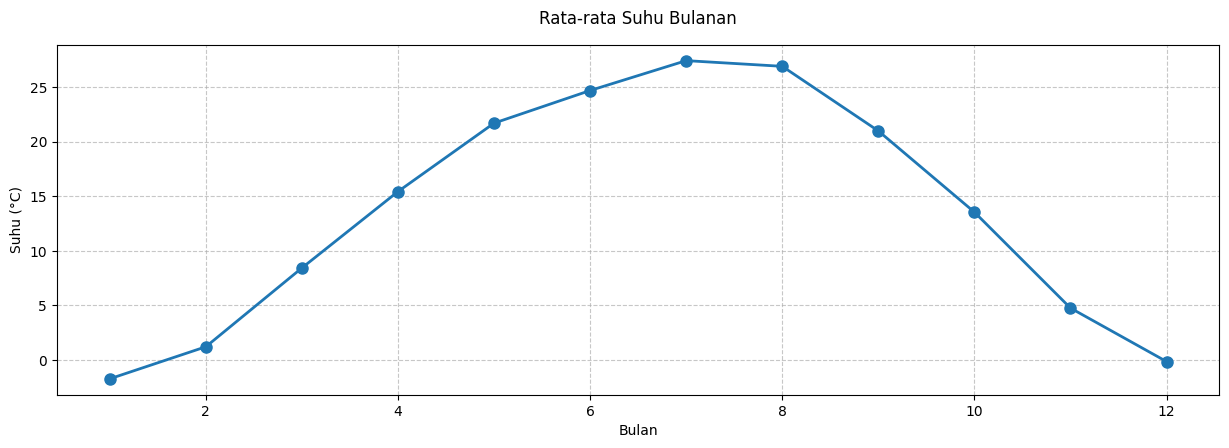

In [101]:
# Rata-rata Suhu Bulanan
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
monthly_avg = df.groupby('month')['TEMP'].mean()
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linewidth=2, markersize=8)
plt.title('Rata-rata Suhu Bulanan', fontsize=12, pad=15)
plt.xlabel('Bulan')
plt.ylabel('Suhu (°C)')
plt.grid(True, linestyle='--', alpha=0.7)


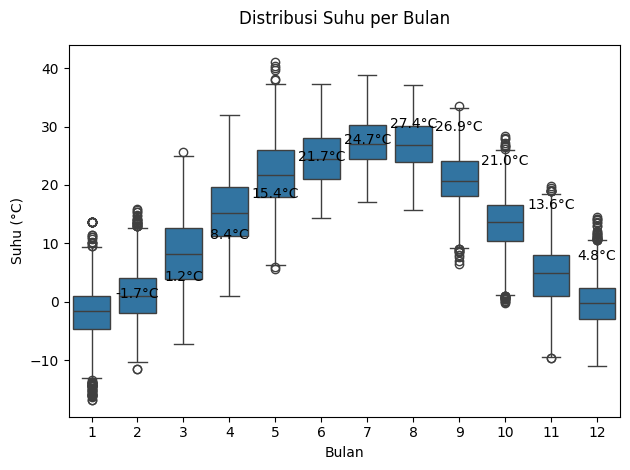

In [102]:

# Menambahkan anotasi nilai pada setiap titik
for i, temp in enumerate(monthly_avg):
    plt.annotate(f'{temp:.1f}°C', 
                (i+1, temp), 
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center')

# Plot distribusi suhu per bulan
sns.boxplot(x='month', y='TEMP', data=df)
plt.title('Distribusi Suhu per Bulan', fontsize=12, pad=15)
plt.xlabel('Bulan')
plt.ylabel('Suhu (°C)')
plt.tight_layout()
plt.show()

**Insight:**
- Pola Musiman yang Jelas:
Suhu tertinggi terjadi pada bulan 7 (Juli) dengan rata-rata 27.44°C
Suhu terendah terjadi pada bulan 1 (Januari) dengan rata-rata -1.72°C
Menunjukkan pola musim yang jelas dengan perbedaan suhu sekitar 29°C antara musim panas dan dingin
- Variabilitas Suhu:
Rentang suhu total sangat luas: dari -16.8°C (minimum) hingga 41.1°C (maksimum)
Variasi suhu terbesar terjadi pada bulan 3 (Maret) dengan standar deviasi 6.16°C, menunjukkan periode transisi musim yang tidak stabil
- Distribusi Suhu:
Rata-rata tahunan suhu adalah 13.67°C
50% suhu berada antara 3.1°C (kuartil pertama) dan 23.5°C (kuartil ketiga)
Menunjukkan distribusi yang cukup merata dengan kecenderungan musiman yang kuat

### Pertanyaan 2: "Bagaimana korelasi antara suhu udara (TEMP) dan kualitas ozon (O3) di atmosfer?"

Text(0, 0.5, 'Ozon (O3)')

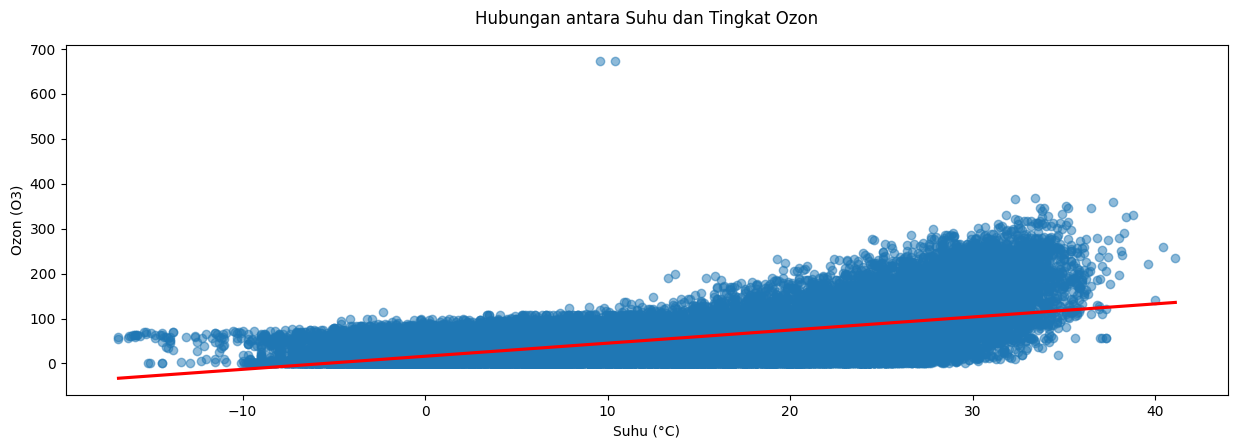

In [103]:


# Plot Scatter plot dengan regression line
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.regplot(x='TEMP', y='O3', data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Hubungan antara Suhu dan Tingkat Ozon', fontsize=12, pad=15)
plt.xlabel('Suhu (°C)')
plt.ylabel('Ozon (O3)')

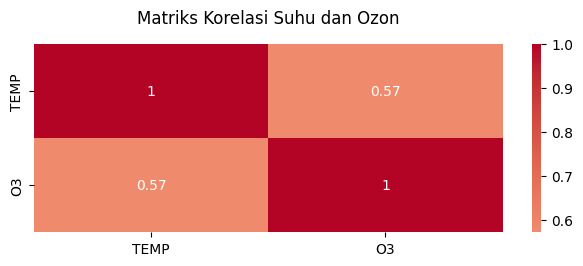

In [106]:

# Plot Heatmap korelasi
plt.subplot(2, 1, 2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriks Korelasi Suhu dan Ozon', fontsize=12, pad=15)
plt.tight_layout()
plt.show()


**Insight:**
- Kekuatan Hubungan:
Korelasi Pearson sebesar 0.572 menunjukkan hubungan positif sedang
Korelasi Spearman sebesar 0.547 mengkonfirmasi hubungan yang konsisten bahkan untuk hubungan non-linear
- Karakteristik Hubungan:
Arah hubungan positif: peningkatan suhu cenderung diikuti dengan peningkatan level ozon
Kekuatan hubungan sedang mengindikasikan bahwa meskipun ada pengaruh suhu terhadap ozon, ada faktor-faktor lain yang juga mempengaruhi level ozon
- Distribusi Variabel:
Level ozon menunjukkan variabilitas yang tinggi (std: 58.37)
Range ozon sangat luas dari 0.43 hingga 674.00
Rasio O3/TEMP tidak valid (inf/nan) karena adanya nilai suhu yang mendekati atau sama dengan nol
- implikasi:
Hubungan positif sedang ini bisa menjadi pertimbangan dalam prediksi kualitas udara
Perlu mempertimbangkan faktor lain selain suhu dalam menganalisis level ozon
Monitoring lebih ketat mungkin diperlukan saat suhu tinggi karena potensi peningkatan level ozon

## Conclusion

### 1. Conclution pertanyaan 1 "Analisis Perubahan Suhu Sepanjang Tahun"
Berdasarkan analisis time series dan pola suhu yang telah dilakukan, dapat disimpulkan bahwa:
1. Stasiun Tiantan mengalami pola musiman yang sangat jelas dengan empat musim yang berbeda:
   - Musim panas (puncak di Juli) dengan suhu rata-rata 27.44°C
   - Musim dingin (terendah di Januari) dengan suhu rata-rata -1.72°C
   - Musim semi dan gugur sebagai periode transisi dengan variabilitas suhu tinggi

2. Wilayah ini memiliki variasi suhu yang ekstrem sepanjang tahun:
   - Rentang suhu sangat luas dari -16.8°C hingga 41.1°C
   - Perubahan suhu paling drastis terjadi pada periode transisi musim (terutama di bulan Maret)
   - Menunjukkan karakteristik iklim kontinental dengan perbedaan suhu yang signifikan antar musim

### 2. Conclution pertanyaan 2 "Analisis Korelasi Suhu Udara dan Kualitas Ozon"
Berdasarkan analisis korelasi dan hubungan multivariat yang telah dilakukan, dapat disimpulkan bahwa:
1. Terdapat hubungan yang signifikan antara suhu udara dan tingkat ozon:
   - Korelasi positif sedang (r = 0.572) menunjukkan kenaikan suhu cenderung diikuti peningkatan level ozon
   - Hubungan ini konsisten baik secara linear (Pearson) maupun non-linear (Spearman)

2. Implikasi untuk kualitas udara:
   - Peningkatan suhu dapat menjadi indikator awal potensi peningkatan level ozon
   - Namun, kekuatan hubungan yang sedang mengindikasikan ada faktor-faktor lain yang juga berpengaruh signifikan
   - Monitoring kualitas udara perlu lebih intensif terutama saat suhu tinggi di musim panas

3. Rekomendasi:
   - Perlu strategi pengendalian emisi yang lebih ketat selama periode suhu tinggi
   - Pengembangan sistem peringatan dini berbasis prediksi suhu untuk antisipasi peningkatan level ozon
   - Penelitian lebih lanjut untuk mengidentifikasi faktor-faktor lain yang mempengaruhi level ozon